<h1><font color='#CD6155'>K-Nearest Neighbor Classification</font><font color='#154360'>: Breast Cancer</font></h1>

In this notebook, I used scikit-learn's <abbr title="K-Nearest Neighbor">KNN</abbr> classifier on the breast cancer dataset to predict whether a patient has breast cancer. I'll then score the accuracy.

Additionally, I'll find the optimal k value, retrain the classifier and score it again.

_______________

In [1]:
# Import the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Import the breast cancer dataset from sklearn:
from sklearn.datasets import load_breast_cancer

In [3]:
# Set the pyplot stylesheet to FiveThirtyEight:
plt.style.use('fivethirtyeight')

In [4]:
# Load the dataset:
bc = load_breast_cancer()

-----------------------------

<h3><font color='#154360'>Data</font></h3>

We'll take a look at the data by printing the first datapoint and then the names of each feature in the datapoint.

In [5]:
# print the first datapoint:
print(bc.data[0])
# print the feature names:
print(bc.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Following, is an explanation of the feature names, taken from the dataset documentation.

Ten real-valued features were computed for each cell nucleus:
<ol>
    <li><font color='blue'>radius</font> - (mean of distances from center to points on the perimeter)</li>
    <li><font color='blue'>texture</font> - (standard deviation of gray-scale values)</li>
    <li><font color='blue'>parimeter</font></li>
    <li><font color='blue'>area</font></li>
    <li><font color='blue'>smoothness</font> - (local variation in radius lengths)</li>
    <li><font color='blue'>compactness</font> - (perimeter**2 / area - 1.0)</li>
    <li><font color='blue'>concavity</font> - (severity of concave portions of the contour)</li>
    <li><font color='blue'>concave points</font> - (number of concave portions of the contour)</li>
    <li><font color='blue'>symmetry</font></li>
    <li><font color='blue'>fractal dimension</font> - ("coastline approximation" - 1)</li>
</ol>

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

The following papers contain detailed descriptions of how these features are computed:
<ul>
    <li>
    W.H. Wolberg, W.N. Street, and O.L. Mangasarian.<br>
	<b>Machine learning techniques to diagnose breast cancer from<br>
        fine-needle aspirates.</b><br>  
	Cancer Letters 77 (1994) 163-171.
    </li>
    <li>
    W.H. Wolberg, W.N. Street, and O.L. Mangasarian. <br>
	<b>Image analysis and machine learning applied to breast cancer<br>
        diagnosis and prognosis.</b>  <br>
	Analytical and Quantitative Cytology and Histology, Vol. 17<br>
	No. 2, pages 77-87, April 1995.
    </li>
    <li>
    W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. <br>
	<b>Computerized breast cancer diagnosis and prognosis from fine<br>
        needle aspirates.</b>  <br>
	Archives of Surgery 1995;130:511-516.
    </li>
    <li>
    W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. <br>
	<b>Computer-derived nuclear features distinguish malignant from<br>
        benign breast cytology.</b><br>  
	Human Pathology, 26:792--796, 1995.
    </li>
</ul>
    

---------------------------------------

<h3><font color='#154360'>Labels</font></h3>

Now we'll look at what we are trying to classify. Following are the labels of every datapoint. We can see that the first datapoint is <font color='blue'>0</font> and with <code>bc.target_names</code> we can see that <font color='blue'>0</font> corresponds with <mark>malignant</mark>.

In [6]:
# Print the labels and the names:
print(bc.target)
print(bc.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
# Count how many are malignant and how many are benign
malignant = []
benign = []
# Count number of malignant and benign:
for item in bc.target:
    if item == 0:
        malignant.append(item)
    elif item == 1:
        benign.append(item)

In [8]:
# Print the results:
print(f'Number of malignant: {len(malignant)}')
print(f'Number of benign: {len(benign)}')

Number of malignant: 212
Number of benign: 357


---------------------

<h2><font color='#CD6155'>Machine Learning</font><font color='#154360'>: K-Nearest Neighbors</font></h2>

We now need to split our dataset into training and validation sets:

In [9]:
# Split the data into training and validation sets:
# Use 'test_size=0.2' for 20% of the data
# random_state=100' to ensure data splits in the same way everytime we run the code:
training_data, validation_data, training_labels, validation_labels = train_test_split(bc.data, bc.target, test_size=0.2, random_state = 100)

Let's make sure that the data and labels are the same size:

In [10]:
# Make sure our data and labels are are the same size:
print(len(training_data))
print(len(training_labels))

455
455


Now let's create the classifier and set k to 3:

In [11]:
# Create the classifier and set k to 3:
classifier = KNeighborsClassifier(n_neighbors = 3)

Now let's train the classifier on the training data:

In [12]:
# Fit the classifier to the training data:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

<h3><font color='#CD6155'>Score</font></h3>
Score with k set to 3:

Now that we've trained our classifier, let's score the accuracy:

In [14]:
# Print the accuracy score of our classifier:
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


----------------------

<h2><font color='#154360'>Finding the Optimal</font> <font color='#CD6155'>K Value</font></h2>

The classifier is pretty accurate with k set to 3, but let's see if there are better k values. We'll graph the results of all k values between 1 and 100:

In [15]:
# Empty list to accept the accuracies with each k value in the range:
accuracies = []
# Set our range:
k_list = range(1, 101)
# Find the accuracies for all k values between 1 and 100:
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    # Train the classifier:
    classifier.fit(training_data, training_labels)
    # append accuracy score to the accuracies list created above:
    accuracies.append(classifier.score(validation_data, validation_labels))

Below, we'll graph the accuracies of k values between 1 and 100:

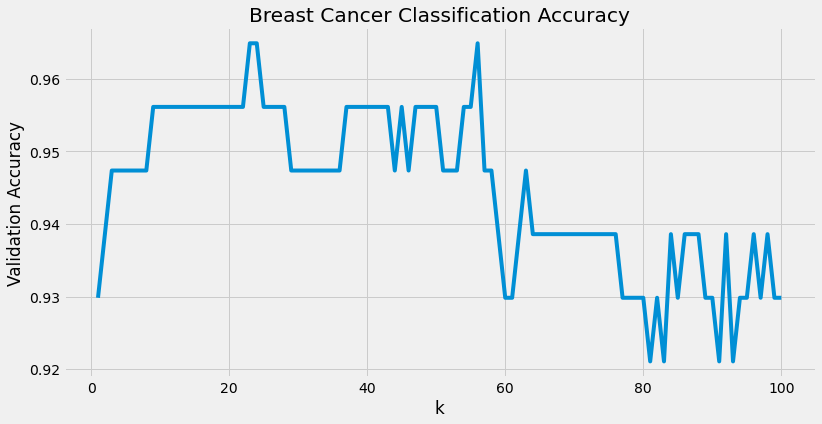

In [17]:
# Create the figure and set it's size:
plt.figure(figsize=(12, 6))
# Create the plot:
plt.plot(k_list, accuracies)
# Set label on x-axis:
plt.xlabel("k")
# set label on y-axis:
plt.ylabel('Validation Accuracy')
# Set title:
plt.title("Breast Cancer Classification Accuracy")
plt.show()

From the graph, we can see that the best k-value is 23:

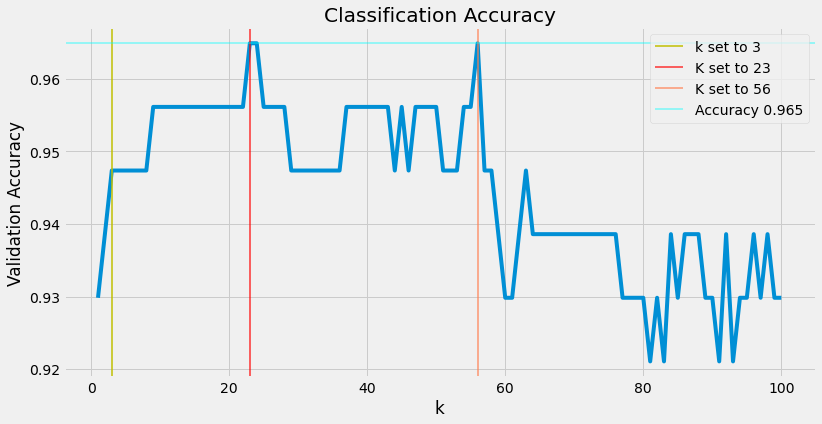

In [24]:
# Create the figure and set it's size:
plt.figure(figsize=(12, 6))
# Create the plot of k value accuracies:
plt.plot(k_list, accuracies)
# Draw a verticle line where the k is 3:
plt.axvline(3, c='y', linewidth=1.5, label='k set to 3')
# Draw verticle line where k value is optimal:
plt.axvline(23, c='r', linewidth=1.5, label='K set to 23', alpha=0.8)
# Draw verticle line where other k value is most accurate:
plt.axvline(56, c='coral', linewidth=1.5, label='K set to 56', alpha=0.8)
# Draw horizontal line where plot line peaks:
plt.axhline(0.965, c='aqua', linewidth=1.5, label='Accuracy 0.965', alpha=0.5)
# Create label on x-axis:
plt.xlabel("k")
# Create legend:
plt.legend(loc='upper right')
# Create label on y-axis:
plt.ylabel('Validation Accuracy')
# Create title:
plt.title("Classification Accuracy")
plt.show()

---------------------------------

<h2><font color='#CD6155'>Retrain</font></h2>

Now we'll create the classifier with a k value of 23 and then train it again:

In [20]:
# Create the classifier and set k to 3:
classifier = KNeighborsClassifier(n_neighbors = 23)
# Train the classifier:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=23)

<h3><font color='#154360'>New</font> <font color='#CD6155'>Score</font></h3>

Next, let's score the classifier's accuracy:

In [21]:
# Print the accuracy score of our classifier:
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


We are now getting ~0.965 accuracy with our classifier. 

------------------